In [19]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
data =pd.read_csv('heart_sample.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3.0,145.0,233.0,1,0,150.0,0.0,2.3,0,0.0,1,1
1,37.0,1,2.0,130.0,250.0,0,1,187.0,0.0,3.5,0,0.0,2,1
2,41.0,0,1.0,130.0,204.0,0,0,172.0,0.0,1.4,2,0.0,2,1
3,56.0,1,1.0,120.0,236.0,0,1,178.0,0.0,0.8,2,0.0,2,1
4,57.0,0,0.0,120.0,354.0,0,1,163.0,1.0,0.6,2,0.0,2,1
5,57.0,1,0.0,140.0,192.0,0,1,148.0,0.0,0.4,1,0.0,1,1
6,56.0,0,1.0,140.0,294.0,0,0,153.0,0.0,1.3,1,0.0,2,1
7,44.0,1,1.0,120.0,263.0,0,1,173.0,0.0,0.0,2,0.0,3,1
8,52.0,1,2.0,172.0,199.0,1,1,162.0,0.0,0.5,2,0.0,3,1
9,57.0,1,2.0,150.0,168.0,0,1,174.0,0.0,1.6,2,0.0,2,1


In [7]:
data.isna().sum()

age          7
sex          0
cp           7
trestbps     6
chol        12
fbs          0
restecg      0
thalach      8
exang        4
oldpeak      0
slope        0
ca           9
thal         0
target       0
dtype: int64

In [8]:
data['age'] = data.age.fillna(data.age.mean())
data['cp'] = data.cp.fillna(data.cp.mean())
data['trestbps'] = data.trestbps.fillna(data.trestbps.mean())
data['exang'] = data.exang.fillna(data.exang.mean())
data['ca'] = data.ca.fillna(data.ca.mean())
data['age'] = data.age.fillna(data.age.mean())
data['thal'] = data.thal.fillna(data.thal.mean())
data['chol'] = data.chol.fillna(data.chol.mean())
data['thalach'] = data.thalach.fillna(data.thalach.mean())

In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.290541,0.683168,0.949324,131.457912,247.051546,0.148515,0.528053,149.193220,0.327759,1.039604,1.399340,0.738095,2.313531,0.544554
std,8.958516,0.466011,1.016812,17.297334,51.489928,0.356198,0.525860,22.588896,0.467059,1.161075,0.616226,1.017778,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,244.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.500000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


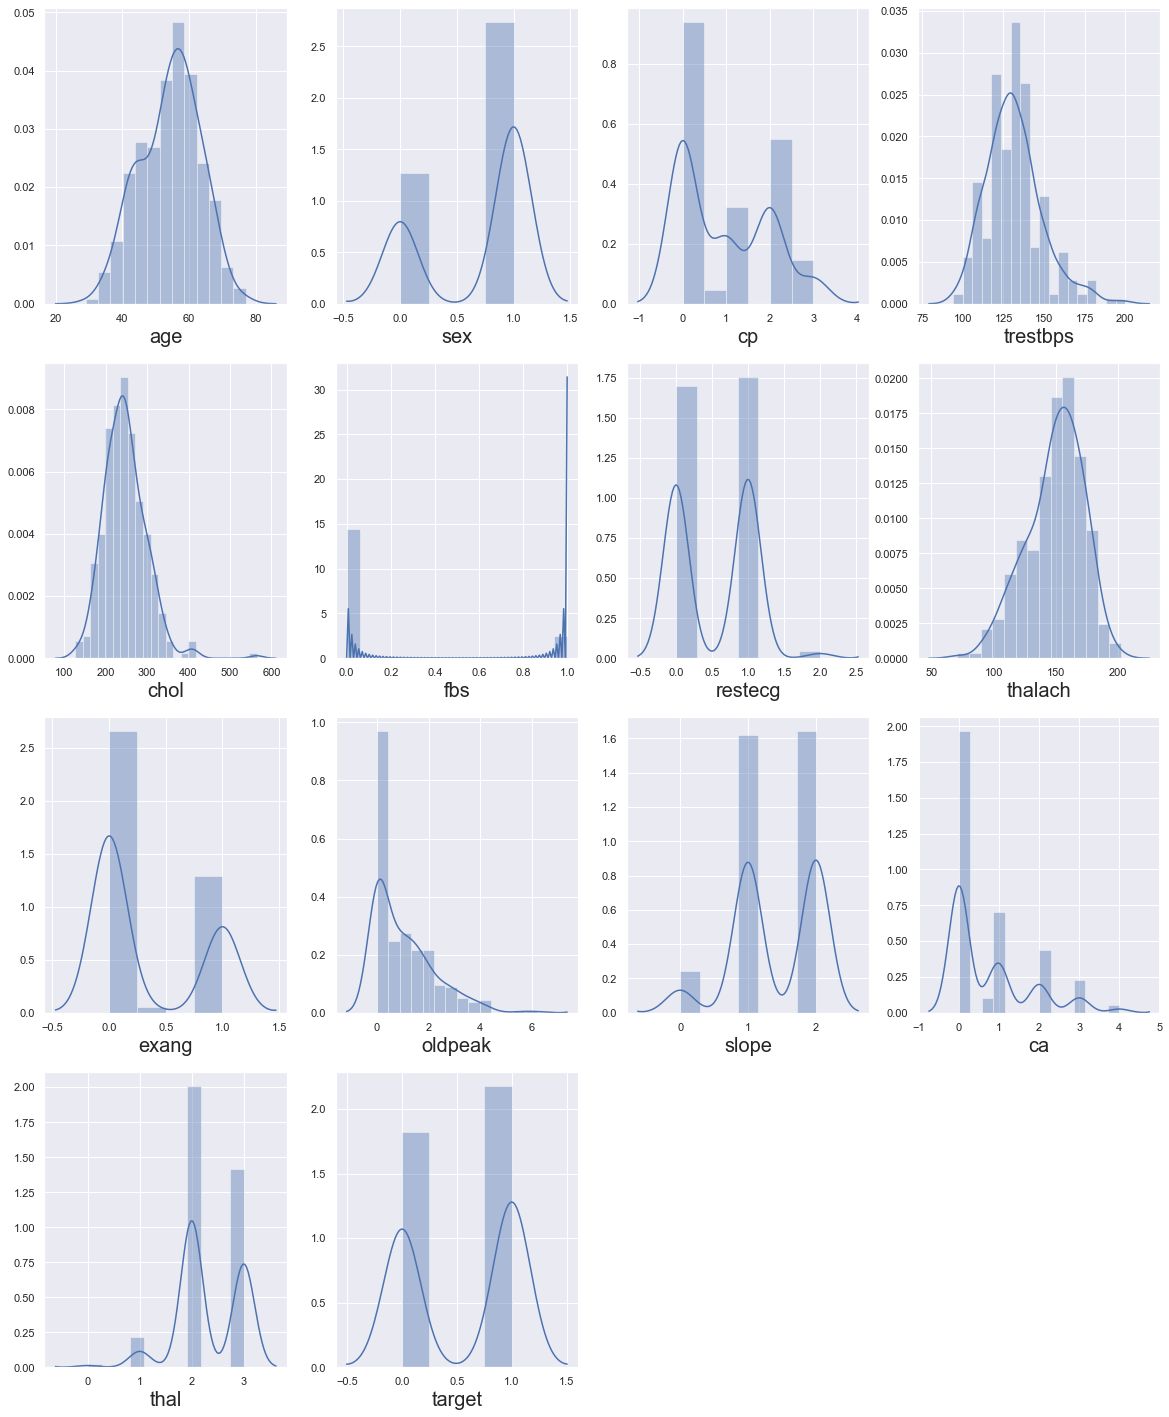

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :     # as there are 9 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

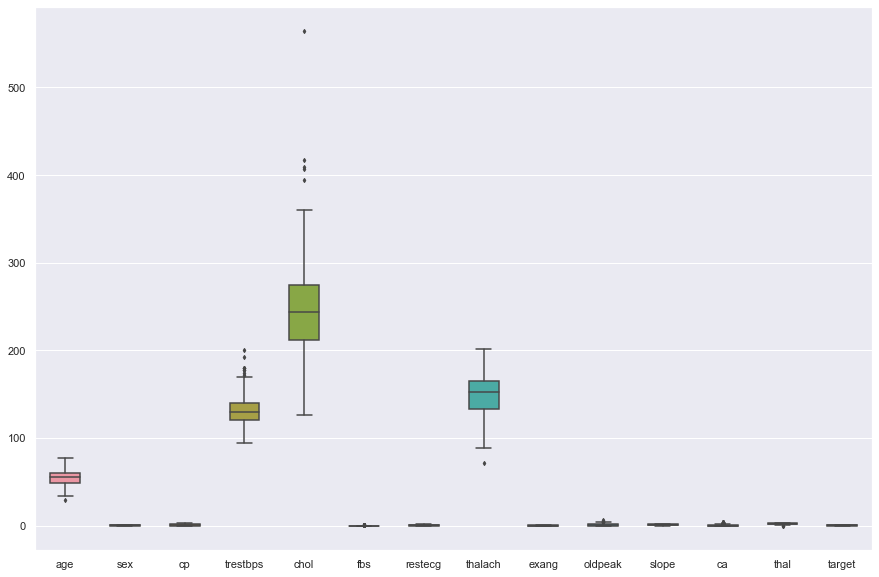

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [13]:
q = data['age'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['age']<q]
q = data_cleaned['sex'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['sex']<q]
q = data_cleaned['cp'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['cp']<q]
q = data_cleaned['trestbps'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['trestbps']<q]
q = data_cleaned['chol'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['chol']<q]
q = data_cleaned['fbs'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['fbs']<q]
q = data_cleaned['restecg'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['restecg']<q]
q = data_cleaned['thalach'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['thalach']<q]
q = data_cleaned['exang'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['exang']<q]
q = data_cleaned['oldpeak'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['oldpeak']<q]
q = data_cleaned['slope'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['slope']<q]
q = data_cleaned['ca'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['ca']<q]
q = data_cleaned['thal'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['thal']<q]

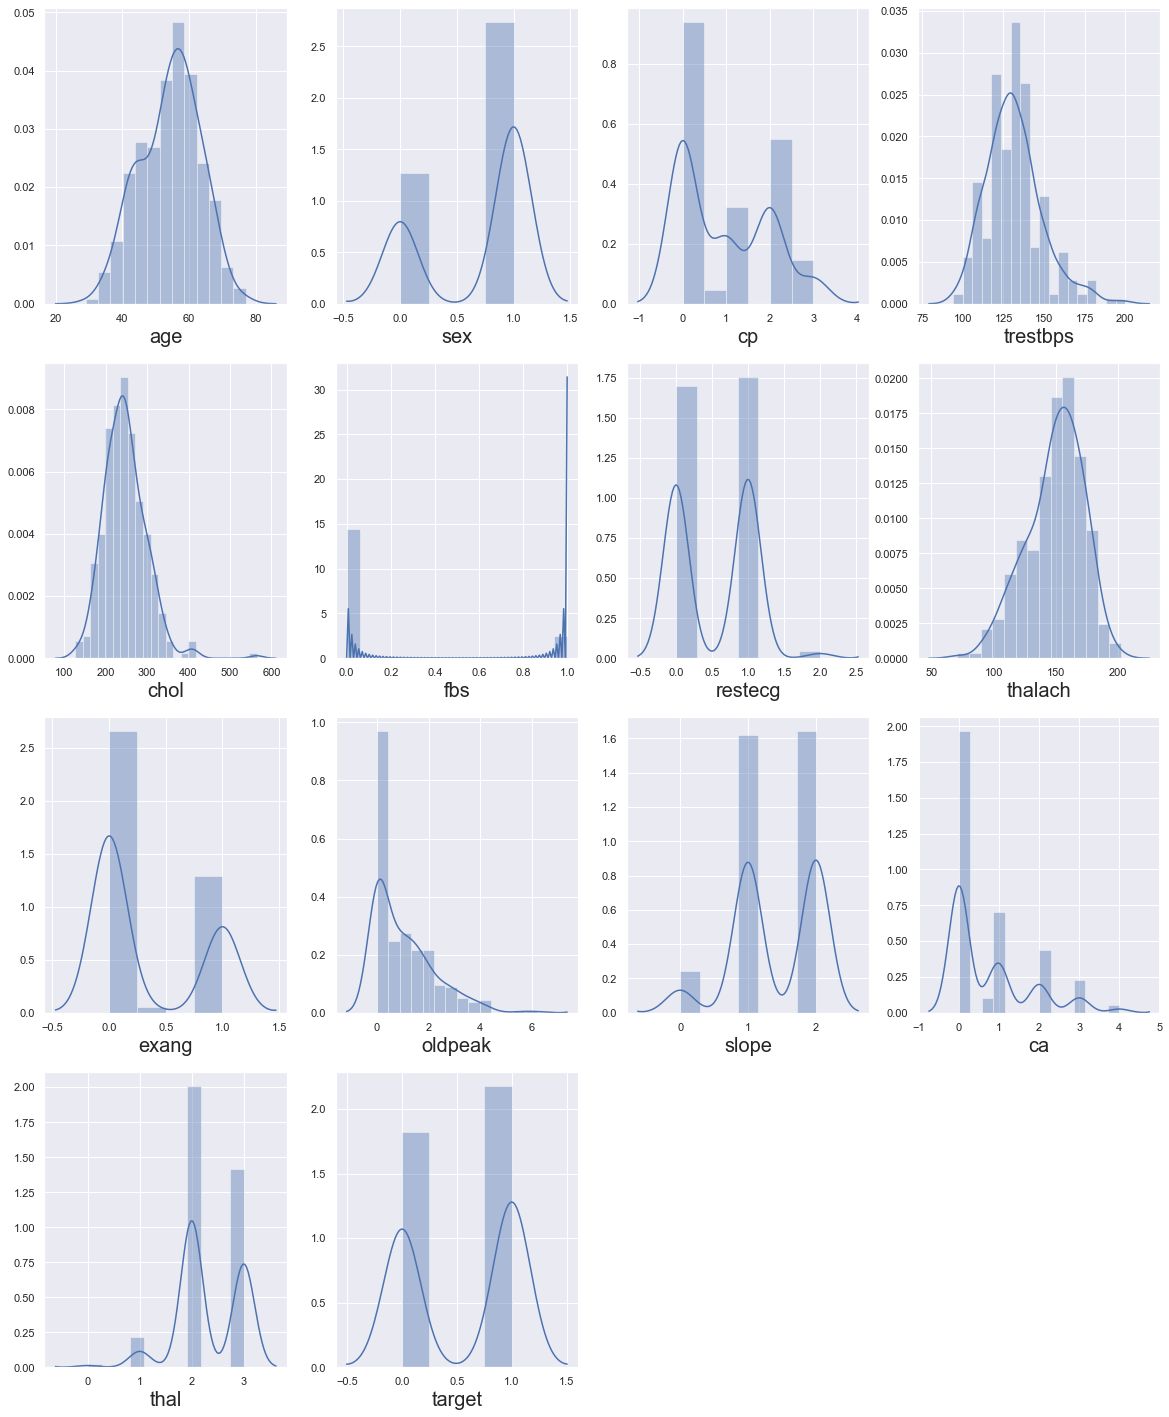

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :     # as there are 9 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
X = data.drop(columns = ['target'])
y = data['target']

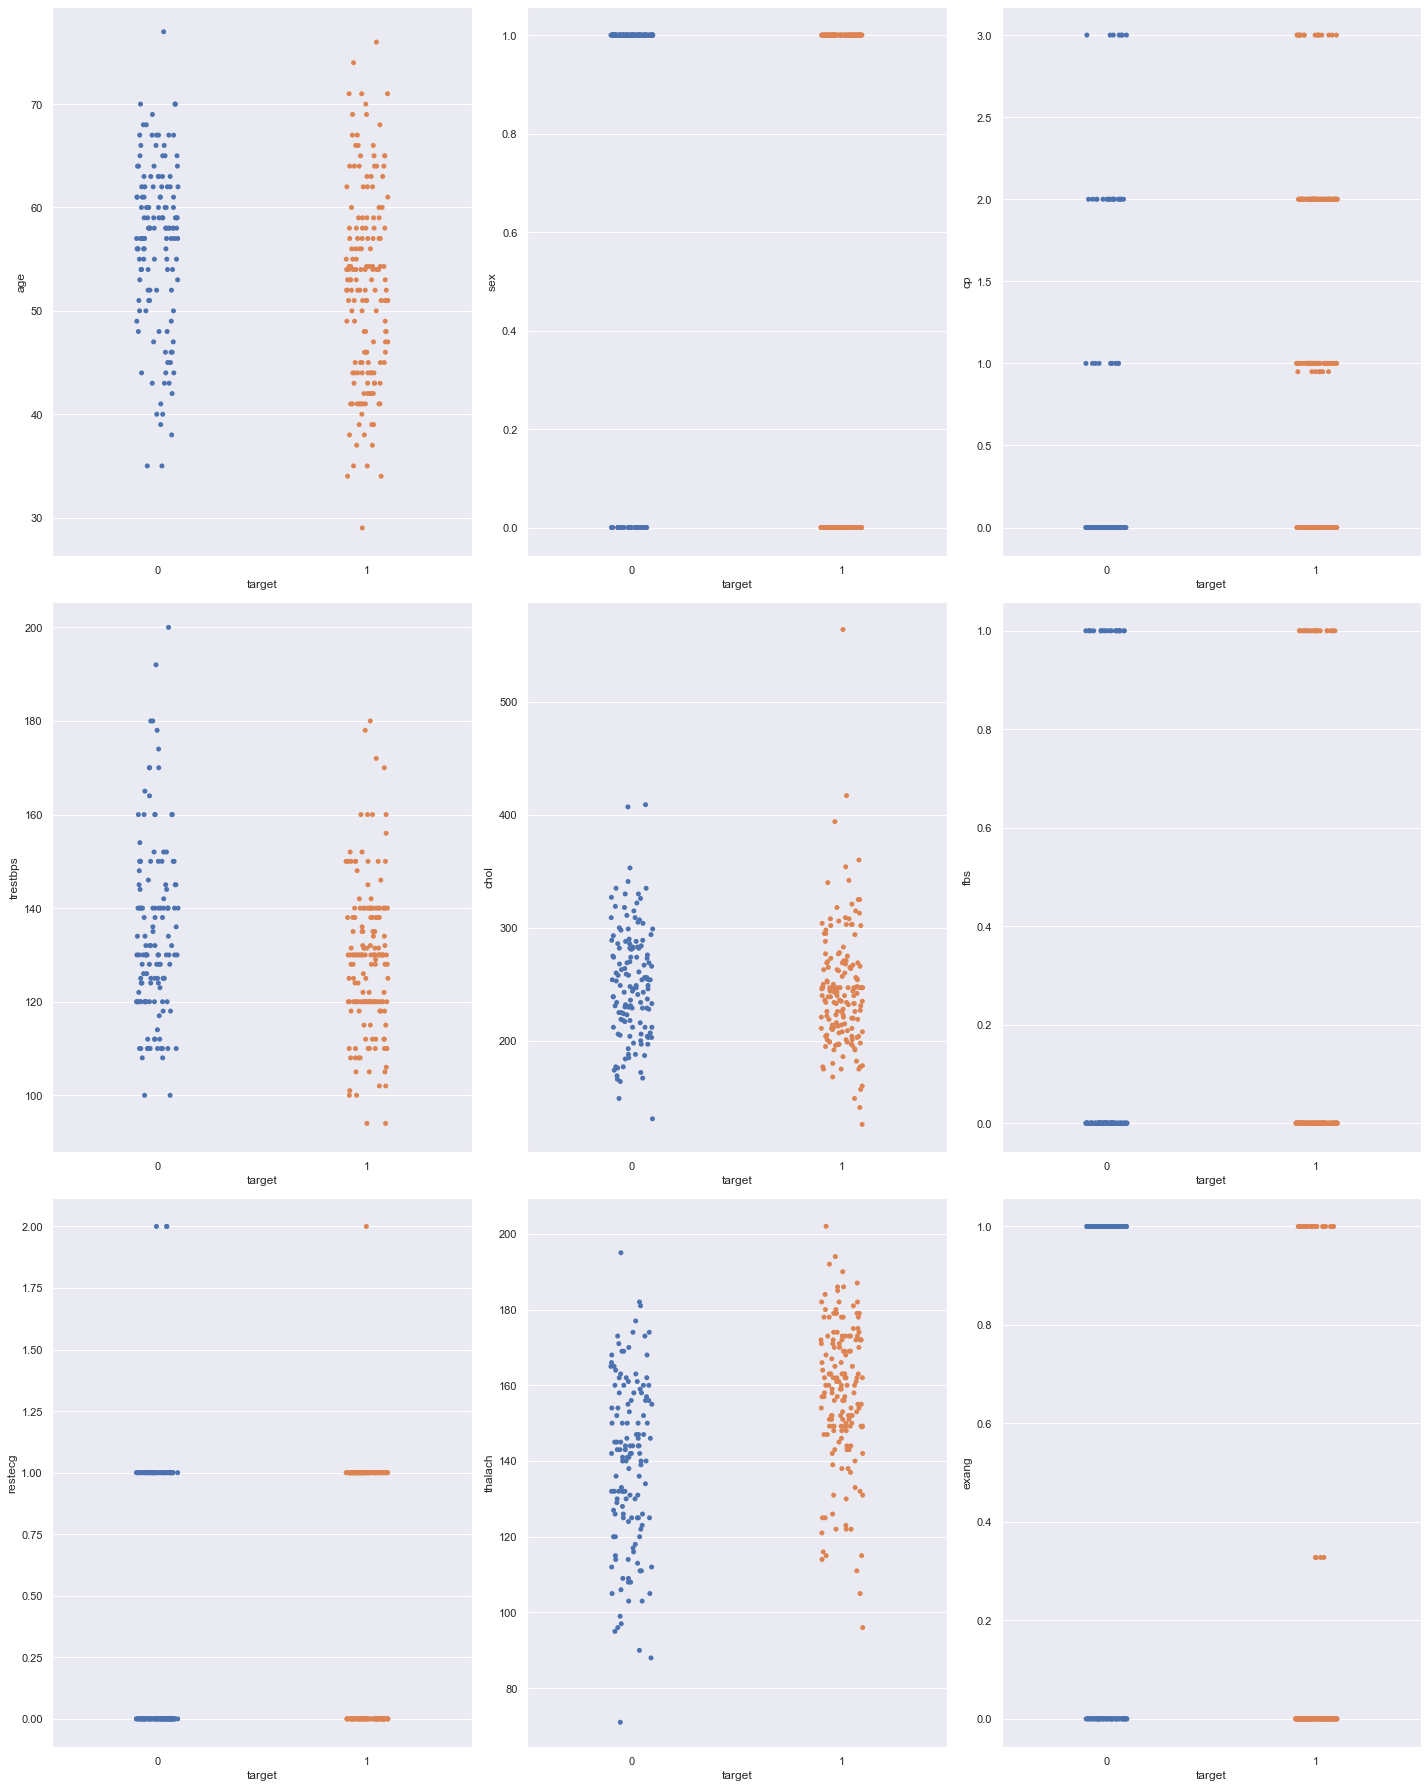

In [16]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [20]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [21]:
X_scaled

array([[ 0.97380716,  0.68100522,  2.02010582, ..., -2.27457861,
        -0.72640229, -2.14887271],
       [-1.9332603 ,  0.68100522,  1.03501303, ..., -2.27457861,
        -0.72640229, -0.51292188],
       [-1.48601915, -1.46841752,  0.04992024, ...,  0.97635214,
        -0.72640229, -0.51292188],
       ...,
       [ 1.5328586 ,  0.68100522, -0.93517254, ..., -0.64911323,
         1.2419136 ,  1.12302895],
       [ 0.30294544,  0.68100522, -0.93517254, ..., -0.64911323,
         0.25775565,  1.12302895],
       [ 0.30294544, -1.46841752,  0.04992024, ..., -0.64911323,
         0.25775565, -0.51292188]])

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [23]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.395658,age
1,1.141744,sex
2,1.296059,cp
3,1.163804,trestbps
4,1.117971,chol
5,1.089556,fbs
6,1.061931,restecg
7,1.561492,thalach
8,1.410007,exang
9,1.703772,oldpeak


In [24]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)
log_reg = LogisticRegression()

In [25]:
log_reg = LogisticRegression()

In [26]:
log_reg.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [28]:
y_pred = log_reg.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8552631578947368

In [30]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[26,  6],
       [ 5, 39]], dtype=int64)

In [31]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [32]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8125

In [33]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8387096774193549

In [34]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8253968253968254

In [35]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8494318181818181